In [1]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# Reading my csv file
df = pd.read_csv('data/eda.csv')

# Converting the date to datetime
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df.head()
df.price.count()

21597

In [61]:
# Checking distributions with histograms & box plots for all numeric values
#for column in df.select_dtypes(include='number'):
    #sns.histplot(x=df[column])
    #plt.title(f'Histogram for {column}')
    #plt.show()

#for column in df.select_dtypes(include='number'):
    #sns.boxplot(x=df[column])
    #plt.title(f'Box plot for {column}')
    #plt.show()


# Based on the box plots/histograms we see outliers in: bedrooms, bathrooms, sqft_living, sqft_lot, sqft_above, sqft_living15, sqft_lot15, price
# I will remove outliers for the house prices (and sqft_lot, sqft_living later on) to be able to visually map price/sqft_lot values
# on my map and detect price/sqft_lot levels in certain areas.






In [4]:
# Cleaning empty rows by adding 0 for in the columns below
df = df.fillna({'view': 0})
df = df.fillna({'waterfront': 0})
df = df.fillna({'sqft_basement': 0})               
df = df.fillna({'yr_renovated': 0})

#Removing the last 0 in yr_renovated
df['yr_renovated'] = df['yr_renovated'] / 10

#msno.matrix(df)




id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
21592   263000018     3.000      2.500     1530.000  1131.000   3.000   
21593  6600060120     4.000      2.500     2310.000  5813.000   2.000   
21594  1523300141     2.000      0.750     1020.000  1350.000   2.000   
21595   291310100     3.000      2.500     1600.000  2388.000   2.000   
21596  1523300157     2.000      0.750     1020.000  1076.000   2.000   

       waterfront  view  condition  grade  ...  sqft_basement  yr_built  \
21592       0.000 0.000          3      8  ...          0.000      2009   
21593       0.000 0.000          3      8  ...          0.000      2014   
21594       0.000 0.000          3      7  ...          0.000      2009   
21595       0.000 0.000          3      8  ...          0.000      2004   
21596       0.000 0.000          3      7  ...          0.000      2008   

       yr_renovated  zipcode    lat     long  sqft_living15  sqft_lot15  \
21592         0.000    98103 47.699 -122.346       1530.000    1509.000   
21593         0.000    98146 47.511 -122.362       1830.000    7200.000   
21594         0.000    98144 47.594 -122.299       1020.000    2007.000   
21595         0.000    98027 47.535 -122.069       1410.000    1287.000   
21596         0.000    98144 47.594 -122.299       1020.000    1357.000   

            date      price  
21592 2014-05-21 360000.000  
21593 2015-02-23 400000.000  
21594 2014-06-23 402101.000  
21595 2015-01-16 400000.000  
21596 2014-10-15 325000.000  

[5 rows x 21 columns]

In [5]:
# Converting the data types to either int or bool
change_data_type = {'bedrooms': int, 'waterfront': bool, 'yr_renovated': int, 'sqft_living': int, 'sqft_lot': int,
'view': int, 'sqft_above': int, 'sqft_basement': int, 'yr_renovated': int, 'sqft_living15': int, 'sqft_lot15': int}

df = df.astype(change_data_type)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   bedrooms       21597 non-null  int32         
 2   bathrooms      21597 non-null  float64       
 3   sqft_living    21597 non-null  int32         
 4   sqft_lot       21597 non-null  int32         
 5   floors         21597 non-null  float64       
 6   waterfront     21597 non-null  bool          
 7   view           21597 non-null  int32         
 8   condition      21597 non-null  int64         
 9   grade          21597 non-null  int64         
 10  sqft_above     21597 non-null  int32         
 11  sqft_basement  21597 non-null  int32         
 12  yr_built       21597 non-null  int64         
 13  yr_renovated   21597 non-null  int32         
 14  zipcode        21597 non-null  int64         
 15  lat            2159

<Axes: >

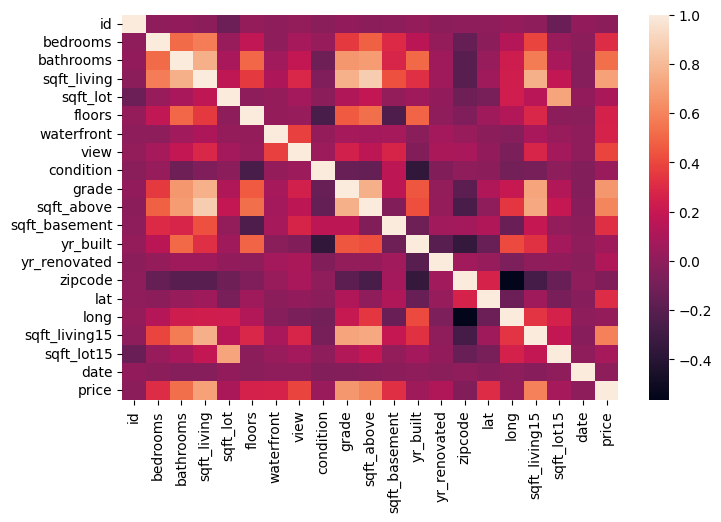

In [6]:
# checking correlation with heatmap in Seaborn:
sns.heatmap(df.corr())

 The correlation between sqft_living and price is: 0.7019173021377596


<Axes: xlabel='sqft_living', ylabel='price'>

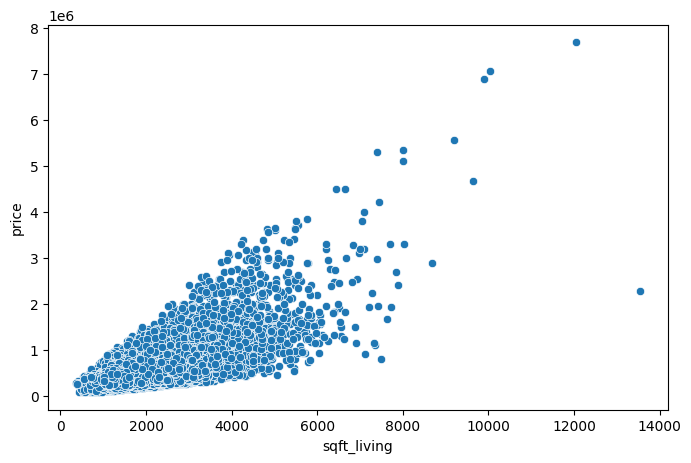

In [62]:
# Pearson correlation coefficient for sqft_living and price:
correlation = df['sqft_living'].corr(df['price'])
print(f' The correlation between sqft_living and price is: {correlation}')

# Scatter for correlation coefficient between sqft_living and price:
sns.scatterplot(data= df, x = 'sqft_living', y = 'price')

In [54]:

import plotly.express as px
# Calculating mean house price 
mean_price = df['price'].mean()
# Adding new column checking if house is above or below mean price
df['above_mean_price'] = df['price'] > mean_price

# Adding new column's calculating the price per sqft_living(15) and sqft_lot(15). I need that later.
df['sqft_living_price'] = df['price'] / df['sqft_living']
df['sqft_lot_price'] = df['price'] / df['sqft_lot']
df['sqft_living15_price'] = df['price'] / df['sqft_living15']
df['sqft_lot15_price'] = df['price'] / df['sqft_lot15']

# Calculating the z-score for the column 'price' and creating new df without price outliers. Threshold is set to 5 (5 std away from mean)
from scipy import stats
z_score = np.abs(stats.zscore(df['price']))
price_thresh = 5
price_outliers = df[z_score > price_thresh]

# Dropping the house price outliers from the dataframe
df_norm = df.drop(price_outliers.index)

# Plotting below and above average mean price houses.
# We see a very clear concentration of house price above the mean in the northern parts of King County.
fig = px.scatter_mapbox(df_norm, lat='lat', lon='long', zoom=10, height=800, color = 'above_mean_price')
fig.update_layout(title='Houses in King County')
fig.update_layout(mapbox_style="open-street-map")

fig.show()
#df.head()

In [53]:
# Creating a map without price outliers to find the most expensive areas
import plotly.express as px
fig = px.scatter_mapbox(df_norm, lat='lat', lon='long', zoom=10, height=800, color = 'price')
fig.update_layout(title='Houses in King County')
fig.update_layout(mapbox_style="open-street-map")

In [52]:
# Reading a csv file I created with all zip codes for Seattle and Bellevue - both places can be considered city.
zip_codes_city = pd.read_csv('data/zip_code_city.csv')

# I turn it into a list in order to look up values with .isin()
zip_codes_city_list = zip_codes_city['zip_code_city'].tolist()

# Creating new column, checking whether the house is in the city or not, described by a bool value (True/False)
df['in_city'] = df['zipcode'].isin(zip_codes_city_list)

# Mapping the city area
fig_central = px.scatter_mapbox(df, lat='lat', lon='long', zoom=10, height=800, color = 'in_city')
fig_central.update_layout(title='Houses in King County')
fig_central.update_layout(mapbox_style="open-street-map")


Difference between average central and non-central houses in %: 37.31638531197903
Average house price in central area: 699315.13 Average price in non-central areas: 509272.90 Average house price (all): 540296.57


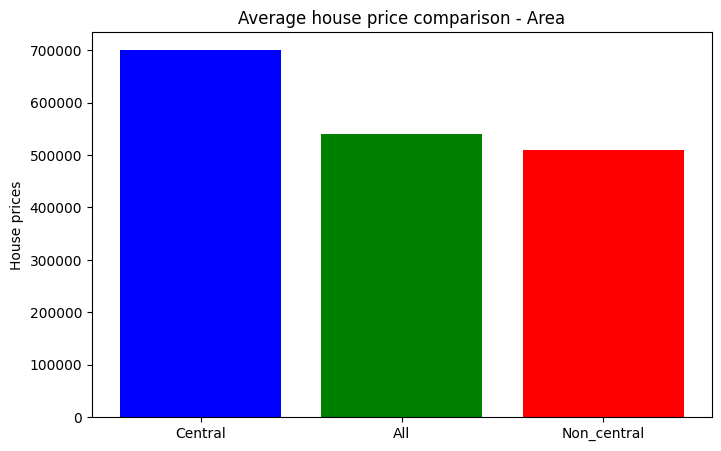

In [12]:
# Zip codes of central area - areas are chosen based on blog posts and online rankings of best central and neighbourhoods in Seattle.
capitol_hill = [98102, 98112, 98122]
fremont = [98103, 98107, 98109]
queen_anne = [98109, 98119]
central_zip_codes = capitol_hill + fremont + queen_anne

# Creating a new column called 'central_area' - checking whether zip code is in the central area or not (True/False)
df_norm['central_area'] = df_norm['zipcode'].isin(central_zip_codes)

# Finding mean for central houses area and non-central houses
central_houses = df_norm[df_norm['central_area']]
central_houses_mean = central_houses['price'].mean()
non_central_houses = df_norm[df_norm['central_area'] == False]
non_central_houses_mean = non_central_houses['price'].mean()
diff_central_non_mean = ((central_houses_mean - non_central_houses_mean) / non_central_houses_mean) * 100

# Creating a bar chart with price mean for central and non-central areas
categories = ['Central', 'All','Non_central']
prices = central_houses_mean, mean_price, non_central_houses_mean
bar_colors = ['blue', 'green', 'red']
fig, ax = plt.subplots()

ax.bar(categories, prices, color=bar_colors)

ax.set_ylabel('House prices')
ax.set_title('Average house price comparison - Area')
print(f'Difference between average central and non-central houses in %: {diff_central_non_mean}')
print("Average house price in central area: {:.2f}".format(central_houses_mean), 
      "Average price in non-central areas: {:.2f}".format(non_central_houses_mean), "Average house price (all): {:.2f}".format(mean_price))

plt.show()

In [13]:
# Mapping the central areas Queen Anne, Capitol Hill and Fremont
fig_central = px.scatter_mapbox(df_norm, lat='lat', lon='long', zoom=10, height=800, color = 'central_area')
fig_central.update_layout(title='Houses in King County')
fig_central.update_layout(mapbox_style="open-street-map")


Correlation coefficient sqft_living & price in central locations: 0.7889934842940596


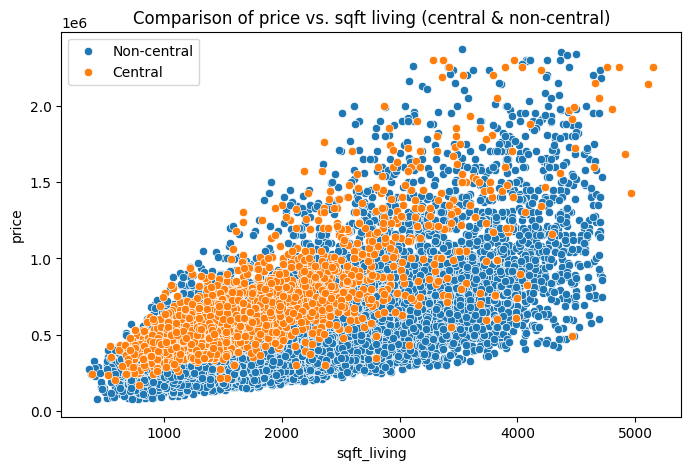

In [14]:
# Calculating Person's correlation coefficitent between sqft_living & price in central locations
correlation_central_sqft = central_houses['sqft_living'].corr(central_houses['price'])
print(f'Correlation coefficient sqft_living & price in central locations: {correlation_central_sqft}')

#Creating new data frame for non-central areas to visualize in scatterplot
df_non_central = df_norm[df_norm['central_area'] == False]

# Calculating the z-score for the column 'sqft_living' for df_non_central to remove outliers
from scipy import stats
z_score_sqft = np.abs(stats.zscore(df_non_central['sqft_living']))
sqft_thresh = 3
sqft_outliers = df_non_central[z_score_sqft > sqft_thresh]

# Dropping the sqft_living outliers from the dataframe
df_non_central = df_non_central.drop(sqft_outliers.index)

# Scatterplot showing correlation between sqft_living and price in the central area
sns.scatterplot(data=df_non_central, x="sqft_living", y="price", label="Non-central")
sns.scatterplot(data=central_houses, x="sqft_living", y="price", label='Central')
plt.title("Comparison of price vs. sqft living (central & non-central)")
plt.show()

# It's clear from the scatterplot that the price per sqft_living starts a lot higher in the central areas compared to non-central.

Mean Price Capitol Hill: 809828.98 Mean Price in Queen Anne: 815720.28 Mean Price in Fremont: 607030.88


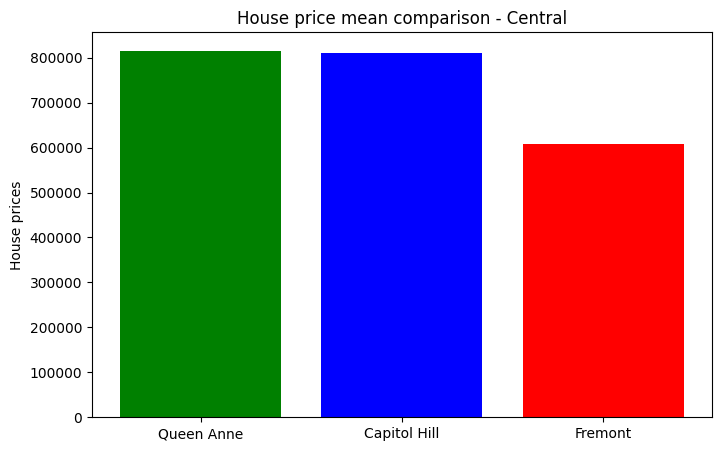

Average price per sqft_living in Capitol Hill: 401.59 Average price per sqft_living in Queen Anne: 428.86 Average price per sqft_living in Fremont: 379.65


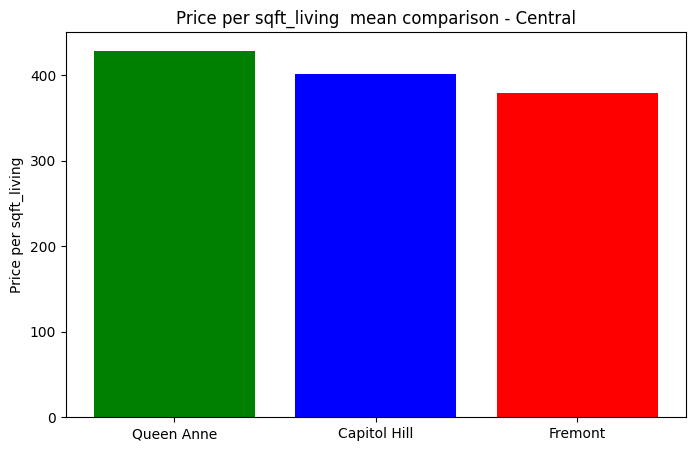

In [17]:
#Copying the dataframe to work on central areas - without price outliers
df_central = df_norm.copy()

# Creating new columns checking if the zip code is in either of the three central locations
df_central['capitol_hill'] = df_central['zipcode'].isin(capitol_hill)
df_central['fremont'] = df_central['zipcode'].isin(fremont)
df_central['queen_anne'] = df_central['zipcode'].isin(queen_anne)

# Creating three new data frames for each central locations
df_ch = df_central[df_central['capitol_hill']]
df_ft = df_central[df_central['fremont']]
df_qa = df_central[df_central['queen_anne']]

# Finding the difference in house price mean for central locations
mean_ch_price = df_ch['price'].mean()
mean_ft_price = df_ft['price'].mean()
mean_qa_price = df_qa['price'].mean()

# Creating a bar chart with house price mean for central locations ('Queen Anne', 'Capitol Hill','Fremont')
areas = ['Queen Anne', 'Capitol Hill','Fremont']
prices_areas =  mean_qa_price, mean_ch_price, mean_ft_price
bar_colors = ['green', 'blue', 'red']
fig, ax = plt.subplots()

ax.bar(areas, prices_areas, color=bar_colors)

ax.set_ylabel('House prices')
ax.set_title('House price mean comparison - Central')

# Printing Mean 
print("Mean Price Capitol Hill: {:.2f}".format(mean_ch_price), 
      "Mean Price in Queen Anne: {:.2f}".format(mean_qa_price), "Mean Price in Fremont: {:.2f}".format(mean_ft_price))

plt.show()

# Finding the mean for price per sqft_living in central locations ('Queen Anne', 'Capitol Hill','Fremont')
mean_ch_sqftliv_price = df_ch['sqft_living_price'].mean()
mean_ft_sqftliv_price = df_ft['sqft_living_price'].mean()
mean_qa_sqftliv_price = df_qa['sqft_living_price'].mean()

# Creating a bar chart with sqft_living price mean for central locations
areas = ['Queen Anne', 'Capitol Hill','Fremont']
sqft_living_areas = mean_qa_sqftliv_price, mean_ch_sqftliv_price, mean_ft_sqftliv_price
bar_colors2 = ['green', 'blue', 'red']
fig, ax = plt.subplots()

ax.bar(areas, sqft_living_areas, color=bar_colors2)

ax.set_ylabel('Price per sqft_living')
ax.set_title('Price per sqft_living  mean comparison - Central')

# Printing mean price per sqft_living 
print("Average price per sqft_living in Capitol Hill: {:.2f}".format( mean_ch_sqftliv_price), 
      "Average price per sqft_living in Queen Anne: {:.2f}".format(mean_qa_sqftliv_price), "Average price per sqft_living in Fremont: {:.2f}".format(mean_ft_sqftliv_price))

# In the two tables below, Queen Anne has the highets average house price and highest average price per sqft_living. 
# Due to a lower sqft price in Capitol Hill and Fremont, these places will be my main focus for my client. 

Mean grade in Capitol Hill: 8.05 Mean grade in Queen Anne: 7.97 Mean grade in Fremont: 7.47 Mean grade total: 7.64


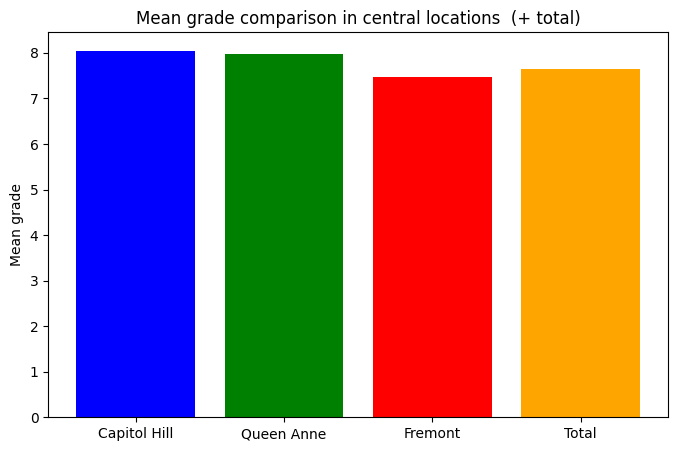

In [18]:
# Finding the grade mean in central locations
mean_ch_grade = df_ch['grade'].mean()
mean_ft_grade = df_ft['grade'].mean()
mean_qa_grade = df_qa['grade'].mean()

# Finding total mean (exculeded price outliers)
mean_total_grade = df_norm['grade'].mean()

# Creating a bar chart comparing grade mean in central locations
areas = ['Capitol Hill', 'Queen Anne','Fremont','Total']
grade_areas = mean_ch_grade ,mean_qa_grade, mean_ft_grade, mean_total_grade
bar_colors2 = ['blue', 'green', 'red', 'orange']
fig, ax = plt.subplots()

ax.bar(areas, grade_areas, color=bar_colors2)

ax.set_ylabel('Mean grade')
ax.set_title('Mean grade comparison in central locations  (+ total)')

# Printing Mean 
print("Mean grade in Capitol Hill: {:.2f}".format( mean_ch_grade), 
      "Mean grade in Queen Anne: {:.2f}".format(mean_qa_grade), "Mean grade in Fremont: {:.2f}".format(mean_ft_grade), "Mean grade total: {:.2f}".format(mean_total_grade))

# We see the highest average grade in Capitol Hill. Fremont's grading is below the total average grade. Therefore, I will focus on Capitol Hill from now. 

In [19]:
# Calculating the mean price per sqftliv15
#mean_ch_sqftliv15_price = df_ch['sqft_living15_price'].mean()
#mean_ft_sqftliv15_price = df_ft['sqft_living15_price'].mean()
#mean_qa_sqftliv15_price = df_qa['sqft_living15_price'].mean()

# Creating a bar chart with sqft_living15 price mean for central locations
#areas = ['Queen Anne', 'Capitol Hill','Fremont']
#sqft_living15_areas = mean_qa_sqftliv15_price, mean_ch_sqftliv15_price, mean_ft_sqftliv15_price
#bar_colors2 = ['green', 'blue', 'red']
#fig, ax = plt.subplots()
###########################
#ax.bar(areas, sqft_living15_areas, color=bar_colors2)

#ax.set_ylabel('Price per sqft_living')
#ax.set_title('Comparison - price per sqft_living15 mean - Central')

# Printing Mean 
#print("Mean price per sqft_living15 in Capitol Hill: {:.2f}".format( mean_ch_sqftliv15_price), 
     # "Mean price per sqft_living15 in Queen Anne: {:.2f}".format(mean_qa_sqftliv15_price), "Mean price per sqft_living15 in Fremont: {:.2f}".format(mean_ft_sqftliv15_price))
################################

In [20]:
# Checking for any waterfronts in Capitol Hill - there are 0
count_true_waterfront = df_ch['waterfront'].sum()
count_true_waterfront

#100 Square Meters ≈ 1,076.3910 Square Feet - this will be the size of apartment I will be looking for. 
# I will filter the data frame for houses with above average grade and below average sqft_living price in Capitol Hill
filtered_df_ch = df_ch[
    (df_ch['grade'] > mean_ch_grade) &  
    (df_ch['price'] / df_ch['sqft_living'] < mean_ch_sqftliv_price) &  
    (df_ch['sqft_living'] >= 1076.3910) &
    (df_ch['condition'] >= 4)]             
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
renovated_df_ch = filtered_df_ch[filtered_df_ch['yr_renovated']>0]
renovated_df_ch.head(20)

# Based on the filtered data frame, I chose the houses with ID 9828700200, 4003000053 and 1952200220.
# They all meet the criteria above, but are also the only ones with condition 4. Therefore, these will be my 'central location' recommendations for the client.



id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
1276  9828700200         4      3.000         2170      4000   2.000   
2982  4003000053         3      2.750         2250      9600   2.500   
9104  1952200220         3      2.500         2290      2798   3.000   

      waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
1276       False     0          4      9        1610            560      1982   
2982       False     0          4      9        1830            420      1909   
9104       False     0          4      9        2290              0      1953   

      yr_renovated  zipcode    lat     long  sqft_living15  sqft_lot15  \
1276          2011    98112 47.620 -122.292           1670        4000   
2982          1991    98122 47.603 -122.287           2060        4980   
9104          1983    98102 47.641 -122.315           2260        5000   

           date      price  above_mean_price  sqft_living_price  \
1276 2014-05-05 831000.000              True            382.949   
2982 2014-08-13 765000.000              True            340.000   
9104 2014-06-03 660000.000              True            288.210   

      sqft_lot_price  sqft_living15_price  sqft_lot15_price  central_area  \
1276         207.750              497.605           207.750          True   
2982          79.688              371.359           153.614          True   
9104         235.883              292.035           132.000          True   

      capitol_hill  fremont  queen_anne  
1276          True    False       False  
2982          True    False       False  
9104          True    False       False

In [26]:
# Country house: I took the coordinates for Lake Sammamish and consider anything east from there to be a good place for the house (long =-122.07098413862795)
# The client does not want a renovated home, so I will filter the data frame for east of the lake and non-renovated
df_country = df_norm[(df_norm['long'] > -122.07098413862795) & (df_norm['yr_renovated'] == 0)]

# Mapping the prices of houses east of Lake Sammish area
fig_country = px.scatter_mapbox(df_country, lat='lat', lon='long', zoom=10, height=800, color = 'price')
fig_country.update_layout(title='Non-renovated country houses in King County')
fig_country.update_layout(mapbox_style="open-street-map")

# It is clear from the map that biggest concentration of higher house prices are found in north west (closer to the city).
# We already knew from previous maps that North was in general more expensive. 



In [38]:
# Removing outliers for sqft_lot for country houses
from scipy import stats
z_score_sqft_lot = np.abs(stats.zscore(df_country['sqft_lot']))
sqft_thresh_lot = 5
sqft_outliers = df_country[z_score_sqft_lot > sqft_thresh_lot]

# Dropping the sqft_lot outliers from the data frame
df_country = df_country.drop(sqft_outliers.index)

# Mapping the sqft lot of houses east of Lake Sammish area
fig_country_lot = px.scatter_mapbox(df_country, lat='lat', lon='long', zoom=10, height=800, color = 'sqft_lot')
fig_country_lot.update_layout(title='Sqft_lot for non-renovated country houses in King County')
fig_country_lot.update_layout(mapbox_style="open-street-map")

In [22]:
# I will calculate the mean price, mean sqft_lot, sqft_lot15 and mean grade for non-renovated houses.
# Since this is a project for the couple, I am more interested in the lot size than living size

# Finding the means
mean_country_price = df_country['price'].mean()
mean_country_sqft_lot = df_country['sqft_lot'].mean()
mean_country_sqft_lot15 = df_country['sqft_lot15'].mean()
mean_country_grade = df_country['grade'].mean()

print("Average price for country house: {:.2f}".format(mean_country_price), 
      "Average sqft_lot: {:.2f}".format(mean_country_sqft_lot), "Average sqft_lot15: {:.2f}".format(mean_country_sqft_lot15), "Average country house grade: {:.2f}".format(mean_country_grade))

Average price for country house: 543542.16 Average sqft_lot: 34704.26 Average sqft_lot15: 27451.53 Average country house grade: 8.05


season
Autumn   534219.545
Spring   557667.983
Summer   546694.215
Winter   524208.718
Name: price, dtype: float64


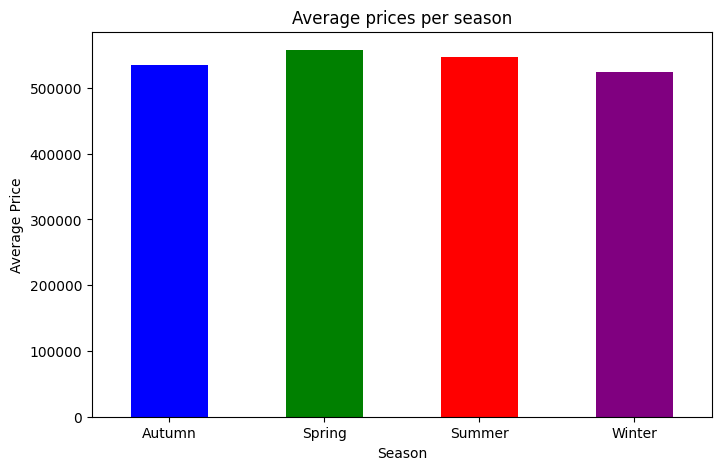

In [23]:
# Creating a new column where I convert dates to seasons for the house sales. First I define a function using '.month'

def dates_to_seasons(date):
    if date.month in [3, 4, 5]:
        return 'Spring'
    elif date.month in [6, 7, 8]:
        return 'Summer'
    elif date.month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'
       
# I apply the function for each date and create the column 'seasons'        
df_country['season'] = df_country['date'].apply(dates_to_seasons)

# Finding the average price for each season with .groupby
mean_price_season = df_country.groupby('season')['price'].mean()

# Creating a bar chart comparing the average house price per season
colors = ['blue', 'green', 'red', 'purple']
mean_price_season.plot(kind='bar', rot= 0, color=colors)
plt.xlabel('Season')
plt.ylabel('Average Price')
plt.title('Average prices per season')

print(mean_price_season)

# We see that spring has the highest average price, while winter is the lowest. Client is looking for best-timing and should
# therefore buy in winter.


In [45]:
# I will try to find a house below the average price in the 
# Creating a new filtered data frame 
df_country_filtered = df_country[
    	(df_country['price'] < mean_country_price) &
        (df_country['sqft_lot'] > mean_country_sqft_lot) &
        (df_country['grade'] > mean_country_grade) & 
        (df_country['condition'] >= 4)]

df_country_filtered.head()

# Mapping the prices of houses east of Lake Sammish area
fig_country2 = px.scatter_mapbox(df_country_filtered, lat='lat', lon='long', zoom=10, height=800, color = 'price')
fig_country2.update_layout(title='Non-renovated country houses in King County')
fig_country2.update_layout(mapbox_style="open-street-map")

In [51]:
# Exporting the data to use in google sheets for the presentation
df_country_filtered.to_csv('data/country_filtered.csv', index=False)
df_country_filtered.head(6)

id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
709    6055000310         3      2.500         3660     39478   2.000   
8903   2223069112         3      2.250         2560    117176   1.000   
16754  5561000190         3      2.250         1970     35100   2.000   
16931   926069142         4      2.500         2870     35757   2.000   
17488  3521069150         3      2.500         2440     71002   1.000   
19049  2320069014         3      2.000         2660    192099   1.000   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
709         False     2          4      9        3260            400   
8903        False     0          4      9        1280           1280   
16754       False     0          4      9        1970              0   
16931       False     0          4      9        2870              0   
17488       False     0          4      9        2440              0   
19049       False     0          4      9        2660              0   

       yr_built  yr_renovated  zipcode    lat     long  sqft_living15  \
709        1989             0    98022 47.241 -121.972           2700   
8903       1977             0    98027 47.465 -122.033           2760   
16754      1977             0    98027 47.464 -121.991           2340   
16931      1977             0    98077 47.757 -122.050           2700   
17488      1996             0    98022 47.269 -122.010           3170   
19049      1964             0    98022 47.210 -122.016           2570   

       sqft_lot15       date      price  above_mean_price  sqft_living_price  \
709         38312 2014-07-01 530000.000             False            144.809   
8903        57063 2014-11-12 465000.000             False            181.641   
16754       35100 2014-05-02 437500.000             False            222.081   
16931       41221 2014-11-24 480000.000             False            167.247   
17488       84000 2014-10-17 431000.000             False            176.639   
19049       43561 2014-07-09 495000.000             False            186.090   

       sqft_lot_price  sqft_living15_price  sqft_lot15_price  central_area  
709            13.425              196.296            13.834         False  
8903            3.968              168.478             8.149         False  
16754          12.464              186.966            12.464         False  
16931          13.424              177.778            11.645         False  
17488           6.070              135.962             5.131         False  
19049           2.577              192.607            11.363         False